# Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary


### Dataset


In [1]:
import warnings

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.nn import Linear, Sequential, Sigmoid
from torch.utils.data import DataLoader, TensorDataset
from utils import load_data

torch.set_default_dtype(torch.float64)

warnings.simplefilter(action="ignore", category=FutureWarning)

X, y = load_data()

In [2]:
print("The first element of X is: ", X[0])

The first element of X is:  tensor([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0

In [3]:
print("The first element of y is: ", y[0, 0])
print("The last element of y is: ", y[-1, 0])

The first element of y is:  tensor(0.)
The last element of y is:  tensor(1.)


In [4]:
print("The shape of X is: " + str(X.shape))
print("The shape of y is: " + str(y.shape))

The shape of X is: torch.Size([1000, 400])
The shape of y is: torch.Size([1000, 1])


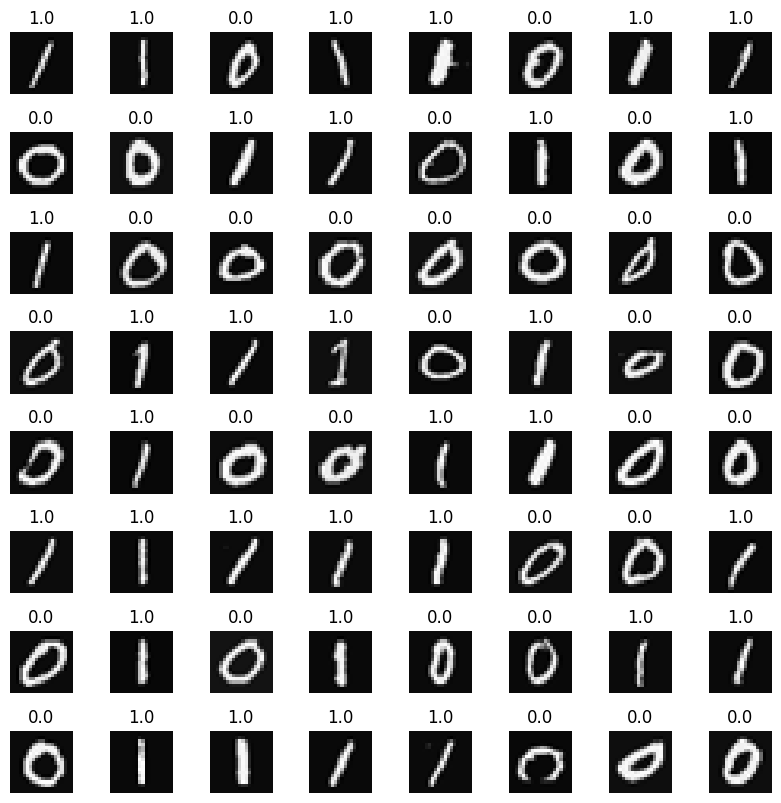

In [5]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap="gray")

    # Display the label above the image
    ax.set_title(y[random_index, 0].item())
    ax.set_axis_off()

## Model Implementation with PyTorch


In [6]:
model = Sequential(
    Linear(400, 25),
    Sigmoid(),
    Linear(25, 15),
    Sigmoid(),
    Linear(15, 1),
    Sigmoid(),
)

model

Sequential(
  (0): Linear(in_features=400, out_features=25, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=25, out_features=15, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=15, out_features=1, bias=True)
  (5): Sigmoid()
)

### Training


In [7]:
cost_fun = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

epochs = 20
dataloader = DataLoader(TensorDataset(X, y), batch_size=32)

for epoch in range(epochs):
    print(f"epoch {epoch+1}/{epochs}")
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()

        output = model(inputs)

        loss = cost_fun(output, labels)

        loss.backward()

        optimizer.step()

    print("epoch {}, loss {}".format(epoch + 1, loss.item()))

epoch 1/20
epoch 1, loss 0.6928460522503419
epoch 2/20
epoch 2, loss 0.6675003544263224
epoch 3/20
epoch 3, loss 0.6276568362170312
epoch 4/20
epoch 4, loss 0.574937673438309
epoch 5/20
epoch 5, loss 0.5177871356596178
epoch 6/20
epoch 6, loss 0.46328633545576037
epoch 7/20
epoch 7, loss 0.4140495080166645
epoch 8/20
epoch 8, loss 0.3700816927964323
epoch 9/20
epoch 9, loss 0.33101278508369114
epoch 10/20
epoch 10, loss 0.2965758845633849
epoch 11/20
epoch 11, loss 0.26646654601837627
epoch 12/20
epoch 12, loss 0.24027723531225118
epoch 13/20
epoch 13, loss 0.21754030174084266
epoch 14/20
epoch 14, loss 0.19778694468596433
epoch 15/20
epoch 15, loss 0.18058419365556494
epoch 16/20
epoch 16, loss 0.16554965766890795
epoch 17/20
epoch 17, loss 0.15235170103815598
epoch 18/20
epoch 18, loss 0.14070716072503694
epoch 19/20
epoch 19, loss 0.13038072429145334
epoch 20/20
epoch 20, loss 0.12117977660001449


In [8]:
prediction = model(X[0].reshape(1, 400))  # a zero
print(f" predicting a zero: {prediction}")

prediction = model(X[500].reshape(1, 400))  # a one
print(f" predicting a one:  {prediction}")

 predicting a zero: tensor([[0.1067]], grad_fn=<SigmoidBackward0>)
 predicting a one:  tensor([[0.8878]], grad_fn=<SigmoidBackward0>)


In [9]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


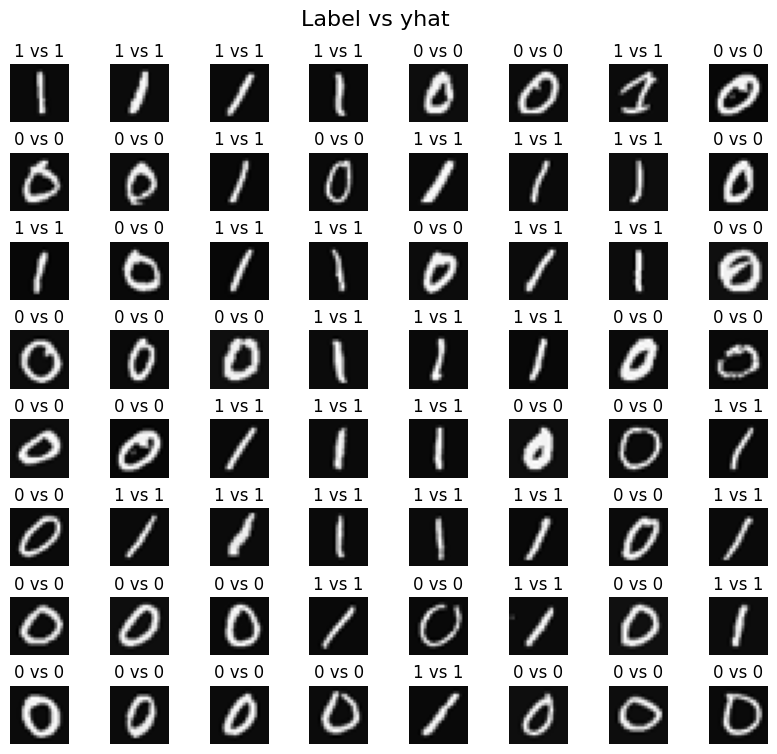

In [10]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  # [left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap="gray")

    # Predict using the Neural Network
    prediction = model(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{int(y[random_index,0].item())} vs {yhat}")
    ax.set_axis_off()
fig.suptitle("Label vs yhat", fontsize=16)
plt.show()